In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [2]:
data = pd.read_csv('Final_data.csv')
data.drop(labels='Unnamed: 0', axis=1, inplace=True)
data.shape

(847031, 129)

In [3]:
Train_data = data.drop(data[data['issue_d_Train'] == 0].index)
Train_data.drop(labels='issue_d_Train', inplace=True, axis=1)
Train_data.to_csv('Train.csv')
Test_data = data[data['issue_d_Train'] == 0]
Test_data.drop(labels='issue_d_Train', inplace=True, axis=1)
Test_data.to_csv('Test.csv')

print('Files written to local successfully')
print('Train shape is : ',Train_data.shape)
print('Test shape is : ',Test_data.shape)

Files written to local successfully
Train shape is :  (626030, 128)
Test shape is :  (221001, 128)


In [4]:
Train_data = pd.read_csv('Train.csv')
Test_data = pd.read_csv('Test.csv')
Train_data.drop(labels='Unnamed: 0', axis=1, inplace=True)
Test_data.drop(labels='Unnamed: 0', axis=1, inplace=True)
print('Train shape is : ',Train_data.shape)
print('Test shape is : ',Test_data.shape)

Train shape is :  (626030, 128)
Test shape is :  (221001, 128)


In [5]:
Test_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,default_ind,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,title_Debt_consolidations,title_Home_expenses,title_Major_purchases,title_Medical_expenses,title_Other_expenses,addr_state_Nort_East,addr_state_South,addr_state_West,earliest_cr_line_1960-79,earliest_cr_line_1980-99,earliest_cr_line_2000-05,earliest_cr_line_2006-10,earliest_cr_line_2011-15,initial_list_status_w,last_pymnt_d_Q1-2009,last_pymnt_d_Q1-2010,last_pymnt_d_Q1-2011,last_pymnt_d_Q1-2012,last_pymnt_d_Q1-2013,last_pymnt_d_Q1-2014,last_pymnt_d_Q1-2015,last_pymnt_d_Q1-2016,last_pymnt_d_Q2-2008,last_pymnt_d_Q2-2009,last_pymnt_d_Q2-2010,last_pymnt_d_Q2-2011,last_pymnt_d_Q2-2012,last_pymnt_d_Q2-2013,last_pymnt_d_Q2-2014,last_pymnt_d_Q2-2015,last_pymnt_d_Q3-2008,last_pymnt_d_Q3-2009,last_pymnt_d_Q3-2010,last_pymnt_d_Q3-2011,last_pymnt_d_Q3-2012,last_pymnt_d_Q3-2013,last_pymnt_d_Q3-2014,last_pymnt_d_Q3-2015,last_pymnt_d_Q4-2008,last_pymnt_d_Q4-2009,last_pymnt_d_Q4-2010,last_pymnt_d_Q4-2011,last_pymnt_d_Q4-2012,last_pymnt_d_Q4-2013,last_pymnt_d_Q4-2014,last_pymnt_d_Q4-2015,next_pymnt_d_Jan-2016,next_pymnt_d_Mar-2016,next_pymnt_d_Unknown,last_credit_pull_d_Q1-2009,last_credit_pull_d_Q1-2010,last_credit_pull_d_Q1-2011,last_credit_pull_d_Q1-2012,last_credit_pull_d_Q1-2013,last_credit_pull_d_Q1-2014,last_credit_pull_d_Q1-2015,last_credit_pull_d_Q1-2016,last_credit_pull_d_Q2-2007,last_credit_pull_d_Q2-2008,last_credit_pull_d_Q2-2009,last_credit_pull_d_Q2-2010,last_credit_pull_d_Q2-2011,last_credit_pull_d_Q2-2012,last_credit_pull_d_Q2-2013,last_credit_pull_d_Q2-2014,last_credit_pull_d_Q2-2015,last_credit_pull_d_Q3-2007,last_credit_pull_d_Q3-2008,last_credit_pull_d_Q3-2009,last_credit_pull_d_Q3-2010,last_credit_pull_d_Q3-2011,last_credit_pull_d_Q3-2012,last_credit_pull_d_Q3-2013,last_credit_pull_d_Q3-2014,last_credit_pull_d_Q3-2015,last_credit_pull_d_Q4-2007,last_credit_pull_d_Q4-2008,last_credit_pull_d_Q4-2009,last_credit_pull_d_Q4-2010,last_credit_pull_d_Q4-2011,last_credit_pull_d_Q4-2012,last_credit_pull_d_Q4-2013,last_credit_pull_d_Q4-2014,last_credit_pull_d_Q4-2015,application_type_JOINT
0,25000.0,25000.0,25000.0,36.0,5.32,752.87,1.0,1.1,1.0,150000.0,0.0,9.54,0.0,0.0,0.0,19339.0,24357.97,24357.97,682.67,682.67,642.03,40.64,0.0,0.0,0.0,701.14,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,18000.0,18000.0,18000.0,60.0,19.48,471.70,5.0,5.2,7.0,150000.0,0.0,9.39,0.0,1.0,1.0,14052.0,17820.50,17820.50,286.64,286.64,179.50,107.14,0.0,0.0,0.0,335.34,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16000.0,16000.0,16000.0,60.0,14.85,379.39,3.0,3.5,10.0,80000.0,0.0,19.59,0.0,0.0,0.0,11113.0,15818.61,15818.61,247.39,247.39,181.39,66.00,0.0,0.0,0.0,280.39,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35000.0,35000.0,35000.0,36.0,8.49,1104.71,2.0,2.1,1.0,90000.0,1.0,13.36,0.0,0.0,0.0,15448.0,35000.00,35000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1013.91,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,

In [6]:
Train_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,default_ind,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,title_Debt_consolidations,title_Home_expenses,title_Major_purchases,title_Medical_expenses,title_Other_expenses,addr_state_Nort_East,addr_state_South,addr_state_West,earliest_cr_line_1960-79,earliest_cr_line_1980-99,earliest_cr_line_2000-05,earliest_cr_line_2006-10,earliest_cr_line_2011-15,initial_list_status_w,last_pymnt_d_Q1-2009,last_pymnt_d_Q1-2010,last_pymnt_d_Q1-2011,last_pymnt_d_Q1-2012,last_pymnt_d_Q1-2013,last_pymnt_d_Q1-2014,last_pymnt_d_Q1-2015,last_pymnt_d_Q1-2016,last_pymnt_d_Q2-2008,last_pymnt_d_Q2-2009,last_pymnt_d_Q2-2010,last_pymnt_d_Q2-2011,last_pymnt_d_Q2-2012,last_pymnt_d_Q2-2013,last_pymnt_d_Q2-2014,last_pymnt_d_Q2-2015,last_pymnt_d_Q3-2008,last_pymnt_d_Q3-2009,last_pymnt_d_Q3-2010,last_pymnt_d_Q3-2011,last_pymnt_d_Q3-2012,last_pymnt_d_Q3-2013,last_pymnt_d_Q3-2014,last_pymnt_d_Q3-2015,last_pymnt_d_Q4-2008,last_pymnt_d_Q4-2009,last_pymnt_d_Q4-2010,last_pymnt_d_Q4-2011,last_pymnt_d_Q4-2012,last_pymnt_d_Q4-2013,last_pymnt_d_Q4-2014,last_pymnt_d_Q4-2015,next_pymnt_d_Jan-2016,next_pymnt_d_Mar-2016,next_pymnt_d_Unknown,last_credit_pull_d_Q1-2009,last_credit_pull_d_Q1-2010,last_credit_pull_d_Q1-2011,last_credit_pull_d_Q1-2012,last_credit_pull_d_Q1-2013,last_credit_pull_d_Q1-2014,last_credit_pull_d_Q1-2015,last_credit_pull_d_Q1-2016,last_credit_pull_d_Q2-2007,last_credit_pull_d_Q2-2008,last_credit_pull_d_Q2-2009,last_credit_pull_d_Q2-2010,last_credit_pull_d_Q2-2011,last_credit_pull_d_Q2-2012,last_credit_pull_d_Q2-2013,last_credit_pull_d_Q2-2014,last_credit_pull_d_Q2-2015,last_credit_pull_d_Q3-2007,last_credit_pull_d_Q3-2008,last_credit_pull_d_Q3-2009,last_credit_pull_d_Q3-2010,last_credit_pull_d_Q3-2011,last_credit_pull_d_Q3-2012,last_credit_pull_d_Q3-2013,last_credit_pull_d_Q3-2014,last_credit_pull_d_Q3-2015,last_credit_pull_d_Q4-2007,last_credit_pull_d_Q4-2008,last_credit_pull_d_Q4-2009,last_credit_pull_d_Q4-2010,last_credit_pull_d_Q4-2011,last_credit_pull_d_Q4-2012,last_credit_pull_d_Q4-2013,last_credit_pull_d_Q4-2014,last_credit_pull_d_Q4-2015,application_type_JOINT
0,5000.0,5000.0,4975.0,36.0,10.65,162.87,2.0,2.2,10.0,24000.0,2.0,27.65,0.0,1.0,0.0,13648.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,60.0,15.27,59.83,3.0,3.4,1.0,30000.0,1.0,1.00,0.0,5.0,0.0,1687.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,36.0,15.96,84.33,3.0,3.5,10.0,12252.0,0.0,8.72,0.0,2.0,0.0,2956.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10000.0,10000.0,10000.0,36.0,13.49,339.31,3.0,3.1,10.0,49200.0,1.0,20.00,0.0,1.0,0.0,5598.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,

In [7]:
X_train = Train_data.drop(labels='default_ind', axis=1)
print('X_train shape is : ',X_train.shape)
y_train = pd.DataFrame(Train_data[['default_ind']])
print('y_train shape is : ',y_train.shape)

X_test = Test_data.drop(labels='default_ind', axis=1)
print('X_test shape is : ',X_test.shape)
y_test = pd.DataFrame(Test_data[['default_ind']])
print('y_test shape is : ',y_test.shape)

X_train shape is :  (626030, 127)
y_train shape is :  (626030, 1)
X_test shape is :  (221001, 127)
y_test shape is :  (221001, 1)


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626030 entries, 0 to 626029
Columns: 127 entries, loan_amnt to application_type_JOINT
dtypes: float64(26), int64(101)
memory usage: 606.6 MB


In [9]:
# def Unique_value_counts(data):
#     value_counts = pd.DataFrame({'Field' : data.columns})
#     value_counts['Counts'] = 0
#     for i in range(len(value_counts.Field)):
#         value_counts.iloc[i,1] = len(data.iloc[:,i].value_counts())
#     value_counts.sort_values(by=['Counts'], inplace=True)
#     return value_counts

# Unique_value_counts(X_train)

In [10]:
X_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,title_Debt_consolidations,title_Home_expenses,title_Major_purchases,title_Medical_expenses,title_Other_expenses,addr_state_Nort_East,addr_state_South,addr_state_West,earliest_cr_line_1960-79,earliest_cr_line_1980-99,earliest_cr_line_2000-05,earliest_cr_line_2006-10,earliest_cr_line_2011-15,initial_list_status_w,last_pymnt_d_Q1-2009,last_pymnt_d_Q1-2010,last_pymnt_d_Q1-2011,last_pymnt_d_Q1-2012,last_pymnt_d_Q1-2013,last_pymnt_d_Q1-2014,last_pymnt_d_Q1-2015,last_pymnt_d_Q1-2016,last_pymnt_d_Q2-2008,last_pymnt_d_Q2-2009,last_pymnt_d_Q2-2010,last_pymnt_d_Q2-2011,last_pymnt_d_Q2-2012,last_pymnt_d_Q2-2013,last_pymnt_d_Q2-2014,last_pymnt_d_Q2-2015,last_pymnt_d_Q3-2008,last_pymnt_d_Q3-2009,last_pymnt_d_Q3-2010,last_pymnt_d_Q3-2011,last_pymnt_d_Q3-2012,last_pymnt_d_Q3-2013,last_pymnt_d_Q3-2014,last_pymnt_d_Q3-2015,last_pymnt_d_Q4-2008,last_pymnt_d_Q4-2009,last_pymnt_d_Q4-2010,last_pymnt_d_Q4-2011,last_pymnt_d_Q4-2012,last_pymnt_d_Q4-2013,last_pymnt_d_Q4-2014,last_pymnt_d_Q4-2015,next_pymnt_d_Jan-2016,next_pymnt_d_Mar-2016,next_pymnt_d_Unknown,last_credit_pull_d_Q1-2009,last_credit_pull_d_Q1-2010,last_credit_pull_d_Q1-2011,last_credit_pull_d_Q1-2012,last_credit_pull_d_Q1-2013,last_credit_pull_d_Q1-2014,last_credit_pull_d_Q1-2015,last_credit_pull_d_Q1-2016,last_credit_pull_d_Q2-2007,last_credit_pull_d_Q2-2008,last_credit_pull_d_Q2-2009,last_credit_pull_d_Q2-2010,last_credit_pull_d_Q2-2011,last_credit_pull_d_Q2-2012,last_credit_pull_d_Q2-2013,last_credit_pull_d_Q2-2014,last_credit_pull_d_Q2-2015,last_credit_pull_d_Q3-2007,last_credit_pull_d_Q3-2008,last_credit_pull_d_Q3-2009,last_credit_pull_d_Q3-2010,last_credit_pull_d_Q3-2011,last_credit_pull_d_Q3-2012,last_credit_pull_d_Q3-2013,last_credit_pull_d_Q3-2014,last_credit_pull_d_Q3-2015,last_credit_pull_d_Q4-2007,last_credit_pull_d_Q4-2008,last_credit_pull_d_Q4-2009,last_credit_pull_d_Q4-2010,last_credit_pull_d_Q4-2011,last_credit_pull_d_Q4-2012,last_credit_pull_d_Q4-2013,last_credit_pull_d_Q4-2014,last_credit_pull_d_Q4-2015,application_type_JOINT
0,25000.0,25000.0,25000.0,36.0,5.32,752.87,1.0,1.1,1.0,150000.0,0.0,9.54,0.0,0.0,0.0,19339.0,24357.97,24357.97,682.67,682.67,642.03,40.64,0.0,0.0,0.0,701.14,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,18000.0,18000.0,18000.0,60.0,19.48,471.70,5.0,5.2,7.0,150000.0,0.0,9.39,0.0,1.0,1.0,14052.0,17820.50,17820.50,286.64,286.64,179.50,107.14,0.0,0.0,0.0,335.34,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16000.0,16000.0,16000.0,60.0,14.85,379.39,3.0,3.5,10.0,80000.0,0.0,19.59,0.0,0.0,0.0,11113.0,15818.61,15818.61,247.39,247.39,181.39,66.00,0.0,0.0,0.0,280.39,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35000.0,35000.0,35000.0,36.0,8.49,1104.71,2.0,2.1,1.0,90000.0,1.0,13.36,0.0,0.0,0.0,15448.0,35000.00,35000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1013.91,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [11]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
MM  = MinMaxScaler()
X_train = MM.fit_transform(X_train)
X_test = MM.fit_transform(X_test)


In [12]:
#Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, train_test_split,KFold,cross_val_score #to split the data and cross validation
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,fbeta_score #for model evaluation


In [13]:
# #set random state
# seed = 7

# #prepare models
# models = []
# models.append(("LogiReg", LogisticRegression()))
# models.append(("LDA", LinearDiscriminantAnalysis()))
# models.append(("KNN", KNeighborsClassifier()))
# models.append(("DT", DecisionTreeClassifier()))
# models.append(("RF", RandomForestClassifier()))
# models.append(("SVM", SVC(gamma = "auto")))
# models.append(("XGB", XGBClassifier()))

In [14]:
# results = []
# names = []
# scoring = "accuracy"

# for name, model in models:
#     kfold = KFold(n_splits=5,random_state=seed)
#     cv_results = cross_val_score(model,X_train,y_train,cv = kfold, scoring = scoring)
#     results.append(cv_results)
#     names.append(name)
#     final_output = (name,cv_results.mean(), cv_results.std())
#     print(final_output)

Result of the above model comparison, Ignored KNN and SVM algorithm:

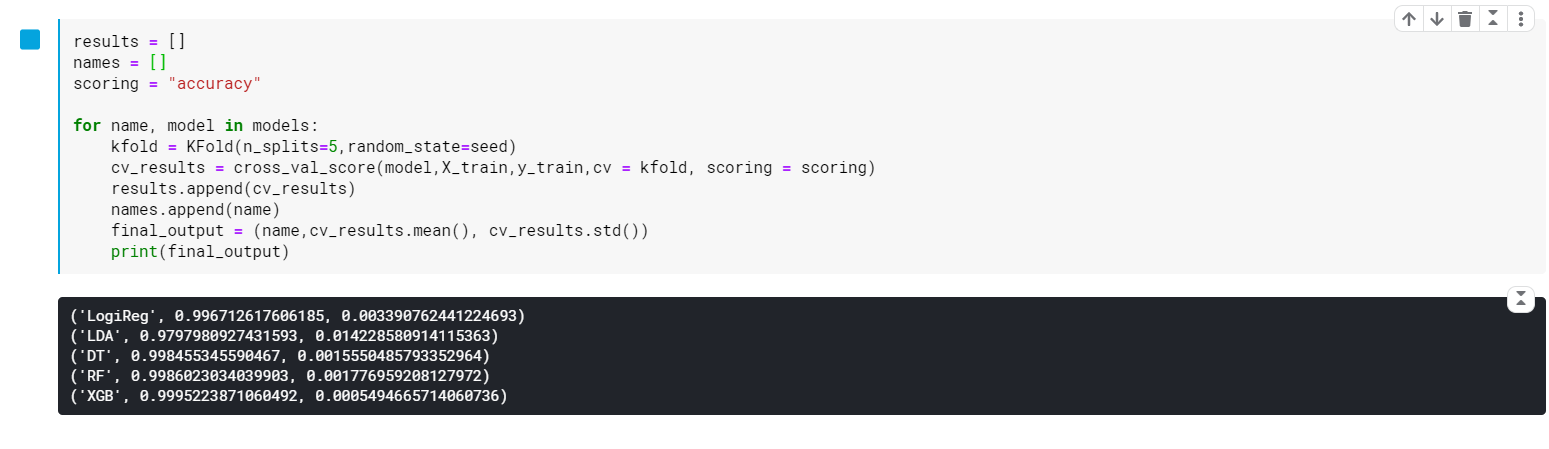

In [15]:
# Commenting out as the model was saved during the previous run in the upcoming lines
XGB=XGBClassifier(njobs=-1)
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              njobs=-1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [16]:
XGB.score(X_train,y_train)

0.9980128747823587

In [17]:
# Saving the model locally to predict the results later and avoid training time
import pickle
# save the model to disk
filename = 'XGB.sav'
pickle.dump(XGB, open(filename, 'wb'))

In [18]:
# load the model from disk
import pickle
XGB = pickle.load(open('XGB.sav', 'rb'))
XGB

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, n_estimators=100, n_jobs=1,
              njobs=-1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

Train accuracy is :  99.80128747823586 %


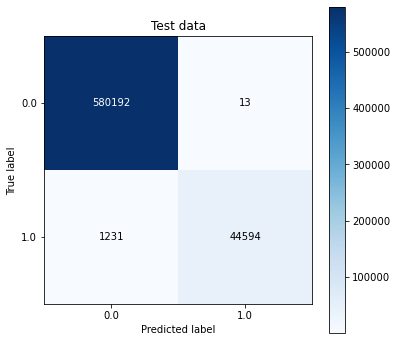

In [19]:
from sklearn.metrics import confusion_matrix
train_pred = XGB.predict(X_train)
train_con= confusion_matrix(y_train,train_pred,labels=[0,1] )
accuracy_train = (train_con[0,0]+train_con[1,1])/np.sum(train_con)
print ('Train accuracy is : ', accuracy_train *100 , '%' )
#0.9980128747823587

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train,train_pred,
    figsize=(6,6), title = 'Test data')

In [26]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    580205
         1.0       1.00      0.97      0.99     45825

    accuracy                           1.00    626030
   macro avg       1.00      0.99      0.99    626030
weighted avg       1.00      1.00      1.00    626030



### ROC Curve for Train data

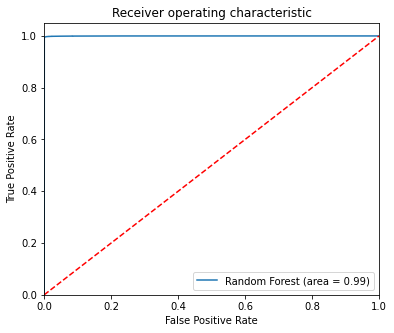

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train, train_pred)
fpr, tpr, thresholds = roc_curve(y_train, XGB.predict_proba(X_train)[:,1])
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC_Train.pdf')
plt.show()

In [21]:
train_pred

array([0., 1., 0., ..., 0., 0., 0.])

Test accuracy is :  99.98280550766738 %


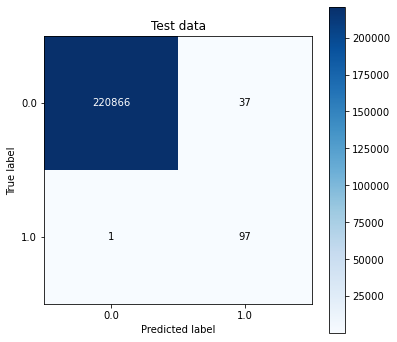

In [22]:
from sklearn.metrics import confusion_matrix
test_pred = XGB.predict(X_test)
test_con= confusion_matrix(y_test,test_pred,labels=[0,1] )
accuracy_test = (test_con[0,0]+test_con[1,1])/np.sum(test_con)
print ('Test accuracy is : ', accuracy_test*100 , '%' )
#0.9998280550766738

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,test_pred,
    figsize=(6,6), title = 'Test data')

In [27]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    220903
         1.0       0.72      0.99      0.84        98

    accuracy                           1.00    221001
   macro avg       0.86      0.99      0.92    221001
weighted avg       1.00      1.00      1.00    221001



### ROC Curve for Test data

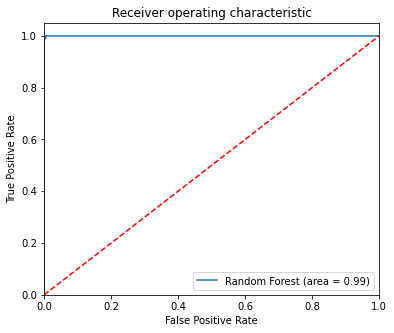

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, test_pred)
fpr, tpr, thresholds = roc_curve(y_test, XGB.predict_proba(X_test)[:,1])
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC_Test.pdf')
plt.show()

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


Models = list(['XG_Boost_Train','XG_Boost_Test'])

Accuracy_collection = list((accuracy_score(y_train,train_pred), (accuracy_score(y_test,test_pred))))
Accuracy_collection = np.around(np.array(Accuracy_collection),5)*100
Accuracy_collection



Roc_values = list((roc_auc_score(y_train,train_pred), roc_auc_score(y_test,test_pred)))

Roc_values = np.around(np.array(Roc_values),2)
Roc_values


F1_score =list((f1_score(y_train,train_pred), f1_score(y_test,test_pred)))
F1_score = np.around(F1_score, decimals=3)
F1_score


Log_loss = list((log_loss(y_train,train_pred), log_loss(y_test,test_pred)))
Log_loss = np.around(Log_loss,decimals=3)
Log_loss

Dict ={'Models' : Models,  'Accuracy' : Accuracy_collection, 'Roc_values' : Roc_values, 'F1-score' : F1_score, 'Log_Loss' : Log_loss}

comparison_report = pd.DataFrame.from_dict(Dict)                                    
comparison_report.set_index('Models')

,Accuracy,Roc_values,F1-score,Log_Loss
Models,,,,
XG_Boost_Train,99.801,0.99,0.986,0.069
XG_Boost_Test,99.983,0.99,0.836,0.006
